<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/12_Autoencoders/Autoencoder_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

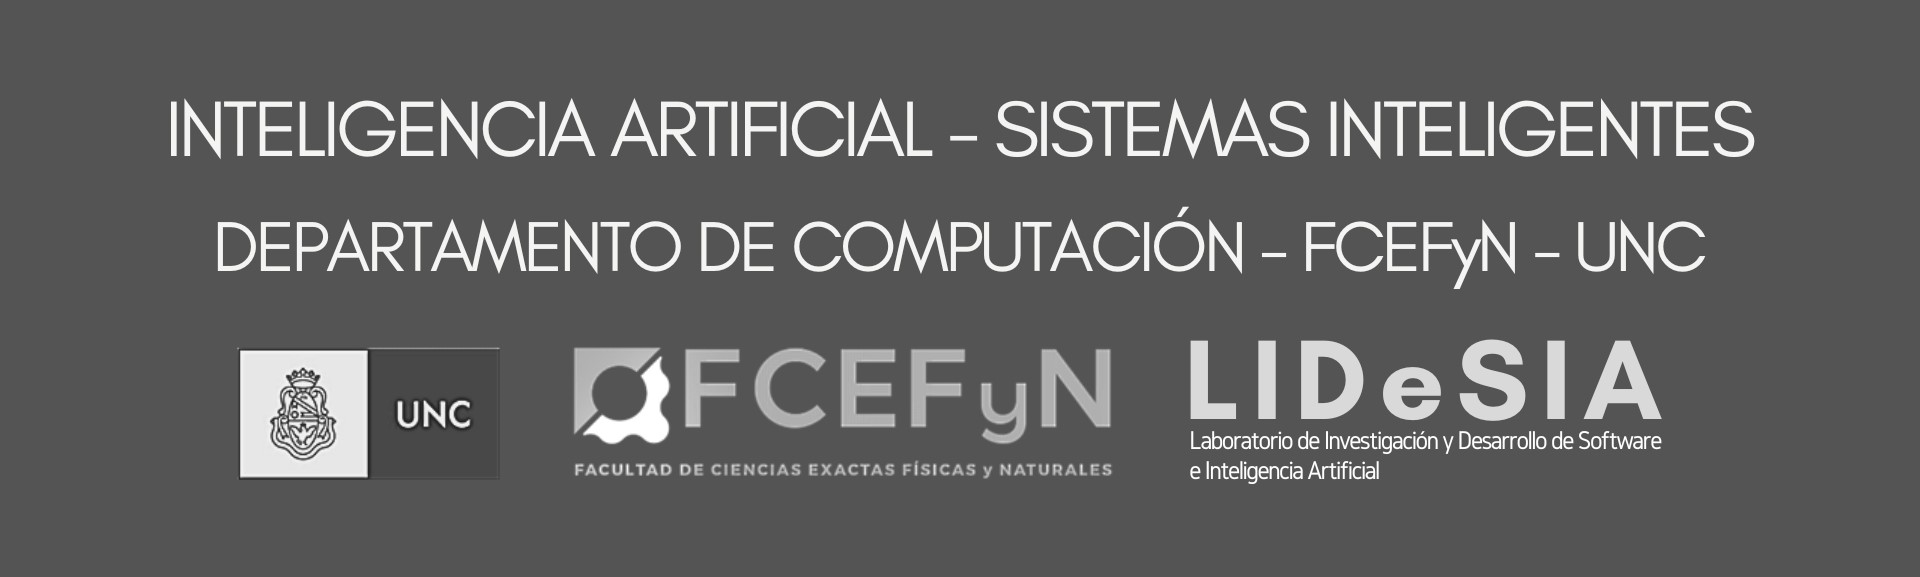

# Autoencoders 📊
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Ing. Sandro Mauricio Comerci (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---



Un **auto-encoder** es una red neuronal que está
entrenada para intentar copiar su entrada a su
salida. Internamente, tiene una capa oculta h
que describe un código utilizado para
representan la entrada. La red puede
considerarse que consta de dos partes: una
función del codificador *h = f(x)* y un
decodificador que produce una reconstrucción *r
= g (h)*

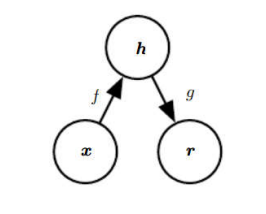

Los auto-encoders están diseñados para
aprender a copiar perfectamente su entrada en
la salida. El modelo está obligado a priorizar qué
aspectos de la entrada deben ser copiados, de
esta manera **suele aprende propiedades útiles
de los datos**.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import keras
from keras import layers
import tensorflow.keras

In [ ]:
(train_inputs, train_label), (test_inputs, test_label) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_inputs = train_inputs.astype('float32') / 255.
test_inputs = test_inputs.astype('float32') / 255.

In [ ]:
print(f"Imagenes de Entrenamiento: {train_inputs.shape}")
print(f"Imagenes de Testeo: {test_inputs.shape}")

Imagenes de Entrenamiento: (60000, 28, 28)
Imagenes de Testeo: (10000, 28, 28)


In [ ]:
class Autoencoder(Model):

  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
      layers.Dropout(0.1)
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder.encoder.summary()

In [ ]:
autoencoder.decoder.summary()

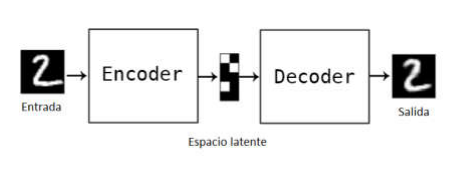

Cada imagen que se ingrese en el auto
encoder primero es convertida a un vector
de 784 componentes, proceso en el que se
pierden todas las relaciones espaciales que
presentan los pixels. Luego de esto, el
encoder aprender a comprimir el conjunto
de datos generando un espacio latente, mientras que el decoder aprende
a reconstruir el vector de entrada de 784
componentes. El vector de salida puede ser
representado como una imagen al aplicar la
transformación inversa que se le aplico a la
imagen de entrada (resize)

In [ ]:
latent_dim = [64,128,256,512]

In [ ]:
trainloss = []
testloss = []

for dim in latent_dim:
  autoencoder = Autoencoder(dim)

  autoencoder.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10, momentum=0.8),
                      loss=losses.MeanSquaredError(),
                      metrics=['accuracy'])

  history = autoencoder.fit(train_inputs, train_inputs,
                            epochs=20,
                            batch_size=1000,
                            shuffle=True,
                            validation_data=(test_inputs, test_inputs))


  trainloss.append(history.history['loss'])
  testloss.append(history.history['val_loss'])

Epoch 1/20
60/60 [==============================] - 3s 32ms/step - loss: 0.0811 - accuracy: 0.0976 - val_loss: 0.0481 - val_accuracy: 0.1531
Epoch 2/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0436 - accuracy: 0.1686 - val_loss: 0.0355 - val_accuracy: 0.1976
Epoch 3/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0355 - accuracy: 0.1979 - val_loss: 0.0293 - val_accuracy: 0.2184
Epoch 4/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0312 - accuracy: 0.2144 - val_loss: 0.0253 - val_accuracy: 0.2352
Epoch 5/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0283 - accuracy: 0.2250 - val_loss: 0.0226 - val_accuracy: 0.2436
Epoch 6/20
60/60 [==============================] - 2s 29ms/step - loss: 0.0263 - accuracy: 0.2323 - val_loss: 0.0205 - val_accuracy: 0.2508
Epoch 7/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0247 - accuracy: 0.2381 - val_loss: 0.0187 - val_accuracy: 0.2552
Epoch 8/20
60

Text(0, 0.5, 'Loss')

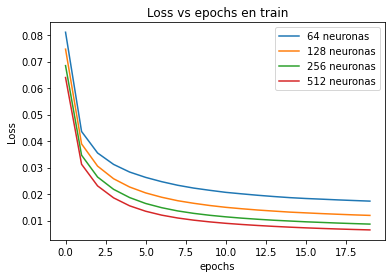

In [ ]:
import seaborn as sns
plt.plot(trainloss[0],label='64 neuronas')
plt.plot(trainloss[1],label='128 neuronas')
plt.plot(trainloss[2],label='256 neuronas')
plt.plot(trainloss[3],label='512 neuronas')
plt.legend()
plt.title("Loss vs epochs en train")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

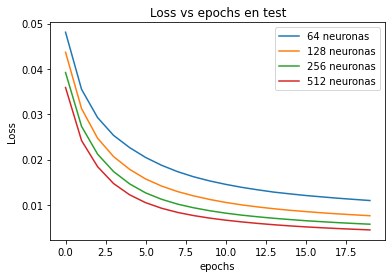

In [ ]:
import seaborn as sns
plt.plot(testloss[0],label='64 neuronas')
plt.plot(testloss[1],label='128 neuronas')
plt.plot(testloss[2],label='256 neuronas')
plt.plot(testloss[3],label='512 neuronas')
plt.title("Loss vs epochs en test")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Loss')

Podemos ver como al aumentar la cantidad
de neuronas en la capa oculta, el autoencoders disminuye las pérdidas de
información ya que el espacio latente que
guarda las características más relevantes
de la imagen tiene mayor dimensión. Esto
se traduce en salidas del decoder con
menor degradación en comparación con las
entradas originales.

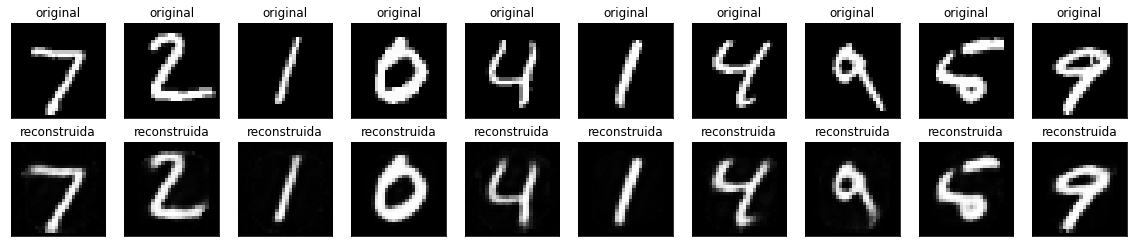

In [ ]:
encoded_imgs = autoencoder.encoder(test_inputs).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_inputs[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstruida")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Una de las variaciones de los auto-encoders
 son los auto-encoders convolucionales que, en
lugar de capas totalmente conectadas, contiene
**capas convolucionales** en el codificador
y **capas deconvolucionales** en la parte del
decodificador. Este tipo de auto-encoder brindan
mejores resultados en las tareas de
procesamiento de imágenes ya que no se pierde
la correlación espacial entre los pixeles de las
imágenes y permiten la extracción de
características propias de la imagen en cada una
de las capas convolucionales, por lo que estas
capas pueden ser pensadas como **filtros
entrenables.**

In [ ]:
input_img= keras.Input(shape=(28,28,1))

enc1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
enc2 = layers.Dropout(.1)(enc1)
encoded = layers.Conv2D(1, (3, 3), activation='relu', padding='same', strides=2)(enc2)

deco1 = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(encoded)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=2)(deco1)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 1)           145       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       160       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                   

In [ ]:
history = autoencoder.fit(train_inputs, train_inputs,
                          epochs=5,
                          batch_size=100,
                          shuffle=True,
                          validation_data=(test_inputs, test_inputs))

Epoch 1/5
600/600 [==============================] - 19s 31ms/step - loss: 0.0679 - val_loss: 0.0366
Epoch 2/5
600/600 [==============================] - 18s 30ms/step - loss: 0.0330 - val_loss: 0.0297
Epoch 3/5
600/600 [==============================] - 18s 31ms/step - loss: 0.0285 - val_loss: 0.0262
Epoch 4/5
600/600 [==============================] - 19s 31ms/step - loss: 0.0257 - val_loss: 0.0236
Epoch 5/5
600/600 [==============================] - 18s 31ms/step - loss: 0.0240 - val_loss: 0.0223


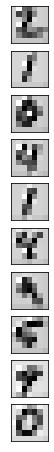

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(test_inputs)

n = 10
plt.figure(figsize=(20, 8))

for i in range(1, n + 1):
    ax = plt.subplot(n, 1, i)
    plt.imshow(encoded_imgs[i].reshape((7, 7 * 1)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img= keras.Input(shape=(28,28,1))

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(32, (2, 2), activation='relu', padding='same', strides=2)(x)
x = layers.Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = layers.Conv2D(8, (2, 2), activation='relu', padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(392, activation='relu')(x)
encoded = layers.Dense(2, activation='relu')(x)

In [ ]:
x = layers.Dense(392, activation='relu')(encoded)
x = layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(8, (2, 2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(16, (2, 2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same')(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2)(x)

decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.8)
autoencoder= keras.Model(input_img, decoded)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 16)          2064      
                                                           

In [ ]:
history=autoencoder.fit(train_inputs, train_inputs,
                epochs=20,
                batch_size=100,
                shuffle=True,
                validation_data=(test_inputs, test_inputs))

Epoch 1/20
600/600 [==============================] - 478s 794ms/step - loss: 0.0587 - val_loss: 0.0554
Epoch 2/20
600/600 [==============================] - 461s 769ms/step - loss: 0.0546 - val_loss: 0.0598
Epoch 3/20
600/600 [==============================] - 459s 765ms/step - loss: 0.0532 - val_loss: 0.0527
Epoch 4/20
600/600 [==============================] - 438s 731ms/step - loss: 0.0480 - val_loss: 0.0447
Epoch 5/20
600/600 [==============================] - 439s 731ms/step - loss: 0.0451 - val_loss: 0.0495
Epoch 6/20
600/600 [==============================] - 442s 737ms/step - loss: 0.0436 - val_loss: 0.0423
Epoch 7/20
600/600 [==============================] - 442s 737ms/step - loss: 0.0428 - val_loss: 0.0424
Epoch 8/20
600/600 [==============================] - 442s 737ms/step - loss: 0.0422 - val_loss: 0.0418
Epoch 9/20
600/600 [==============================] - 443s 738ms/step - loss: 0.0416 - val_loss: 0.0461
Epoch 10/20
600/600 [==============================] - 441s 735m

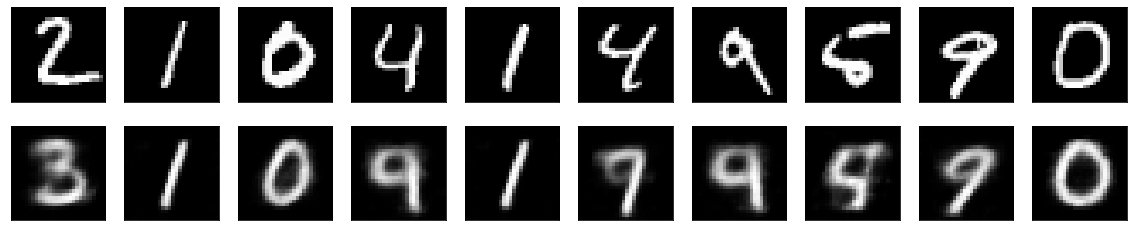

In [ ]:
decoded_imgs = autoencoder.predict(test_inputs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_inputs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)


encoder = keras.Model(input_img, encoded)

def plot_latent(mode, count, technique):
    idx = np.random.choice(len(test_inputs), count)
    inputs = test_inputs[idx]
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(technique)
    if technique == 'autoencoder':
        coords = encoder.predict(inputs)
    elif technique == 'pca':
        coords = PCA(n_components=2).fit_transform(inputs.reshape(count, -1))


    if mode == 'imgs':
        for image, (x, y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
            ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
    elif mode == 'dots':
        classes = test_labels[idx]
        plt.scatter(coords[:, 0], coords[:, 1], c=classes, cmap='viridis')
        plt.colorbar()



    plt.show()

plot_latent('dots', 10000, 'pca')
plot_latent('imgs', 300, 'pca')
plot_latent('dots', 10000, 'autoencoder')
plot_latent('imgs', 300, 'autoencoder')


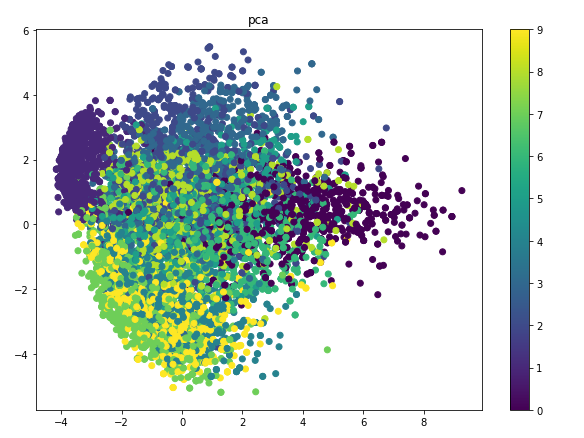

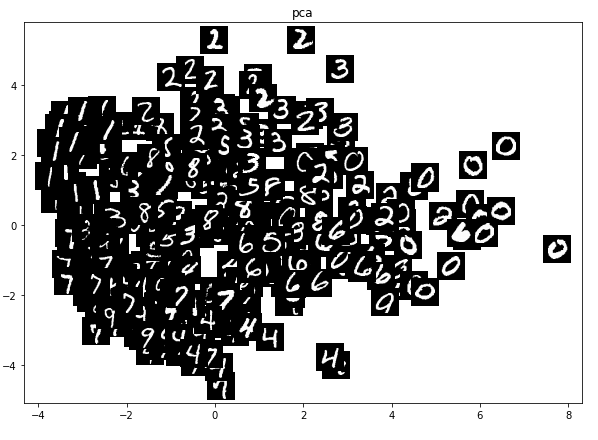

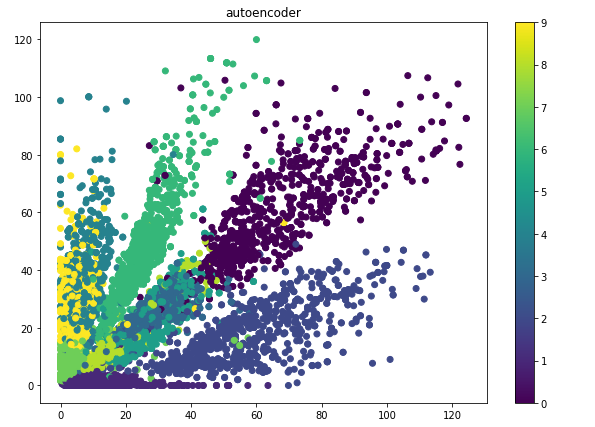

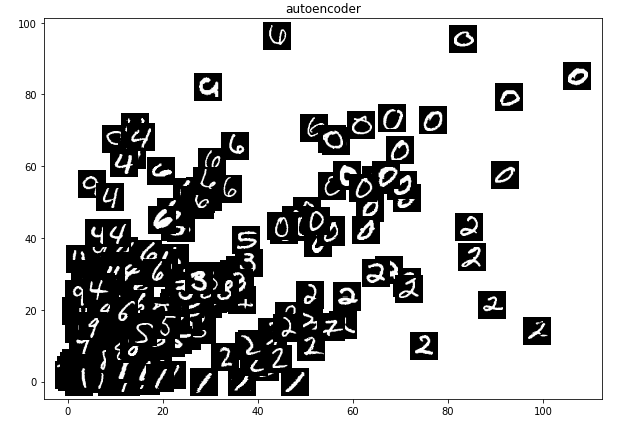

In [ ]:
input_img= keras.Input(shape=(28,28,1))

enc1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
enc2 = layers.Dropout(.1)(enc1)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(enc2)

deco1 = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(encoded)
#deco2 = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(deco1)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=2)(deco1)

autoencoder= keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                   

In [ ]:
history=autoencoder.fit(train_inputs, train_inputs,
                        epochs=5,
                        batch_size=100,
                        shuffle=True,
                        validation_data=(test_inputs, test_inputs))

Epoch 1/5
600/600 [==============================] - 22s 36ms/step - loss: 0.0343 - val_loss: 0.0058
Epoch 2/5
600/600 [==============================] - 19s 32ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 3/5
600/600 [==============================] - 18s 30ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 4/5
600/600 [==============================] - 18s 30ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 5/5
600/600 [==============================] - 18s 30ms/step - loss: 0.0025 - val_loss: 0.0017


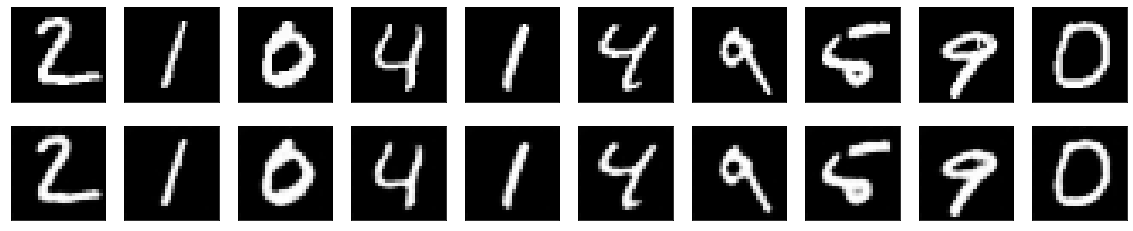

In [ ]:
decoded_imgs = autoencoder.predict(test_inputs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_inputs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
train_Y_one_hot = tf.keras.utils.to_categorical(train_label)
test_Y_one_hot = tf.keras.utils.to_categorical(test_label)
print('Original label:', train_label[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
def encoder(input_img):

    x = tensorflow.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
    x = layers.Dropout(.1)(x)
    encoded = tensorflow.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x)

    return encoded

def classificador(enco):
    x=layers.Flatten()(encoded)
    x=layers.Dense(392, activation='relu')(x)
    classif=layers.Dense(10, activation='softmax')(x)
    return classif

encode=encoder(input_img)
full_model=keras.Model(input_img, classificador(encode))

In [ ]:
for l1,l2 in zip(full_model.layers[:2],autoencoder.layers[0:2]):
    l1.set_weights(l2.get_weights())

In [ ]:
autoencoder.get_weights()[0][1]

array([[[-0.1717009 , -0.02479963,  0.31973076,  0.02906419,
          0.03316531, -0.11012557,  0.27242893,  0.35221902,
         -0.19407855,  0.25094876,  0.33288044, -0.3182221 ,
         -0.2266741 , -0.20047879,  0.21825172,  0.09864616]],

       [[ 0.69827765,  0.35029763,  0.6789298 , -0.01384752,
         -0.42368442, -0.4726435 ,  0.5796224 ,  0.44832587,
         -0.17062147,  0.50301564, -0.00191455,  0.26108804,
         -0.67412657, -0.4058775 , -0.39850208, -0.10654666]],

       [[ 0.23174305,  0.19646035,  0.3083312 , -0.07072798,
         -0.3004233 ,  0.20282622,  0.02928715,  0.12583229,
          0.4688483 ,  0.22053447, -0.36527768,  0.33776107,
         -0.30140144, -0.24208438, -0.29609317, -0.23243594]]],
      dtype=float32)

In [ ]:
full_model.get_weights()[0][1]

array([[[-0.1717009 , -0.02479963,  0.31973076,  0.02906419,
          0.03316531, -0.11012557,  0.27242893,  0.35221902,
         -0.19407855,  0.25094876,  0.33288044, -0.3182221 ,
         -0.2266741 , -0.20047879,  0.21825172,  0.09864616]],

       [[ 0.69827765,  0.35029763,  0.6789298 , -0.01384752,
         -0.42368442, -0.4726435 ,  0.5796224 ,  0.44832587,
         -0.17062147,  0.50301564, -0.00191455,  0.26108804,
         -0.67412657, -0.4058775 , -0.39850208, -0.10654666]],

       [[ 0.23174305,  0.19646035,  0.3083312 , -0.07072798,
         -0.3004233 ,  0.20282622,  0.02928715,  0.12583229,
          0.4688483 ,  0.22053447, -0.36527768,  0.33776107,
         -0.30140144, -0.24208438, -0.29609317, -0.23243594]]],
      dtype=float32)

In [ ]:
for layer in full_model.layers[0:2]:
    layer.trainable = False

In [ ]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
full_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 392)               154056    
                                                                 
 dense_1 (Dense)             (None, 10)                3930

In [ ]:
history=classify_train = full_model.fit(train_inputs, train_Y_one_hot,
                          batch_size=100,
                          epochs=5,
                          verbose=1,
                          validation_data=(test_inputs, test_Y_one_hot))

Epoch 1/5
600/600 [==============================] - 11s 18ms/step - loss: 0.3837 - accuracy: 0.8861 - val_loss: 0.1752 - val_accuracy: 0.9471
Epoch 2/5
600/600 [==============================] - 9s 16ms/step - loss: 0.1476 - accuracy: 0.9553 - val_loss: 0.1096 - val_accuracy: 0.9658
Epoch 3/5
600/600 [==============================] - 9s 16ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0847 - val_accuracy: 0.9740
Epoch 4/5
600/600 [==============================] - 9s 15ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.0742 - val_accuracy: 0.9767
Epoch 5/5
600/600 [==============================] - 9s 16ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0633 - val_accuracy: 0.9799


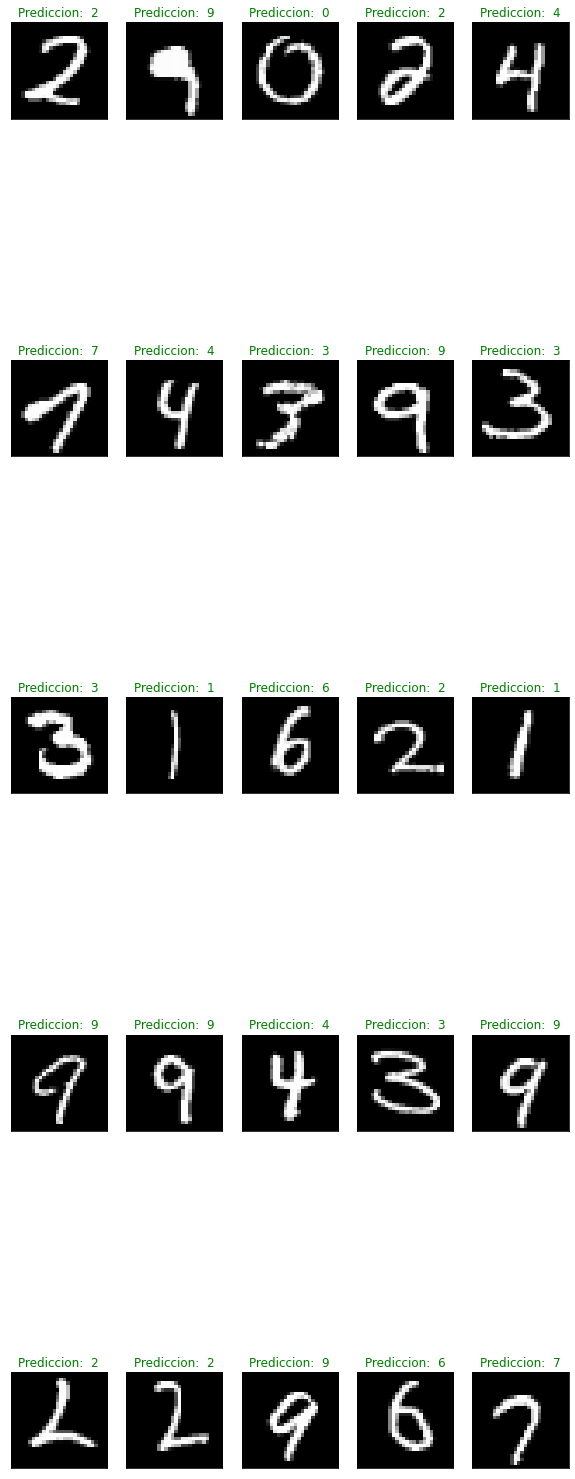

In [ ]:
predicciones = full_model.predict(test_inputs)

fig, ax = plt.subplots(5, 5, figsize=[10, 30])


for j in range(5):
    for i in range(5):

       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(test_inputs[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Prediccion:  ' + str(np.argmax(predicciones[random_image])), color='g')

plt.show()

##Autoencoder vs Variational Autoencoder (VAE)

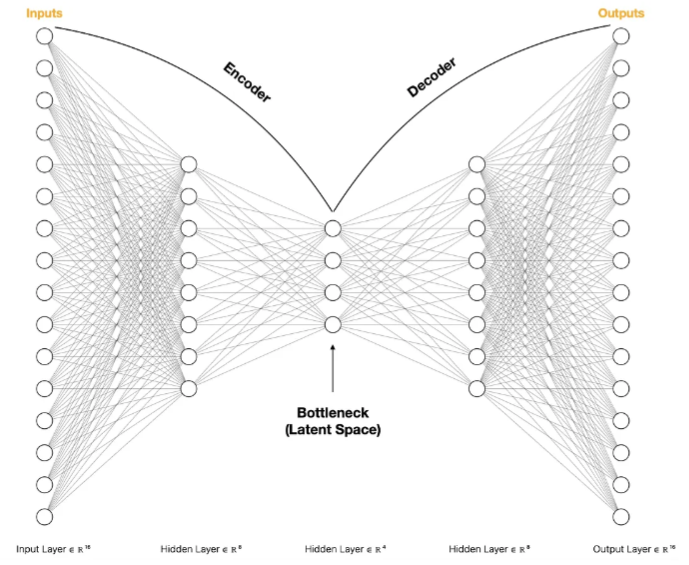

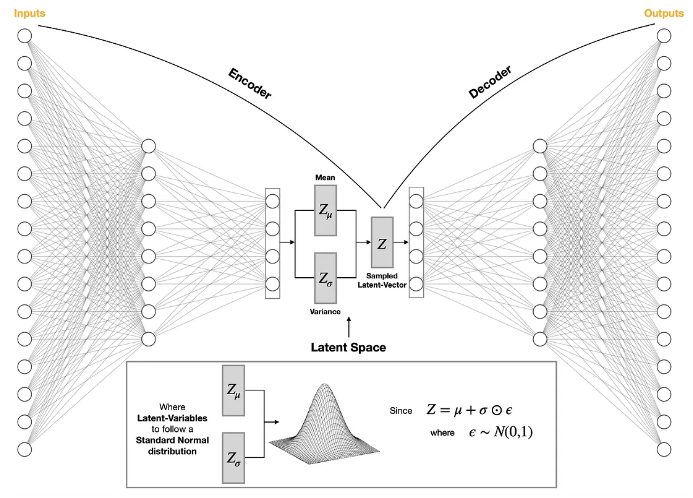

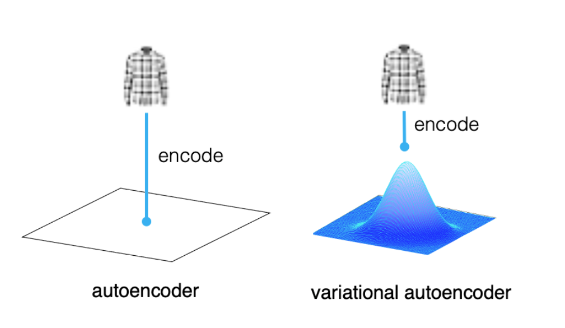

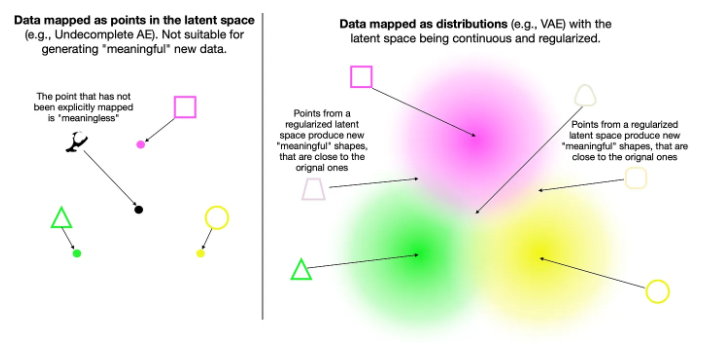

[towardsdatascience](https://towardsdatascience.com/vae-variational-autoencoders-how-to-employ-neural-networks-to-generate-new-images-bdeb216ed2c0)

[vitalflux](https://vitalflux.com/autoencoder-vs-variational-autoencoder-vae-difference/)